1. Preparación de datos

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("../dataset/taco_sales_2024-2025.csv")


In [7]:
df

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,164891,La Vida Taco,Austin,27-05-2024 11:12,27-05-2024 12:11,59,Large,Veggie Taco,2,20.04,7.00,2.80,False
996,232442,The Taco Stand,San Antonio,03-04-2025 20:51,03-04-2025 21:29,38,Regular,Fish Taco,0,13.69,3.00,1.38,False
997,251729,Urban Tacos,Houston,23-01-2025 05:33,23-01-2025 06:41,68,Regular,Pork Taco,2,4.07,5.50,2.00,False
998,940215,Taco Fiesta,San Antonio,05-09-2024 15:49,05-09-2024 16:38,49,Regular,Veggie Taco,5,14.56,9.25,1.89,False


# 2. Limpieza y transformación
Seleccionamos las columnas relevantes y codificamos las categóricas:

In [8]:
# Convertir columnas categóricas en variables dummies
df_model = pd.get_dummies(df[['Distance (km)', 'Weekend Order', 'Taco Size', 'Taco Type', 'Toppings Count']], drop_first=True)

# Variable dependiente
y = df['Delivery Duration (min)']
X = df_model


# 3. Entrenamiento del modelo
Dividimos los datos y entrenamos la regresión:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


4. Evaluación del modelo
Veamos qué tan bien predice el modelo:

In [13]:
import numpy as np

y_pred = modelo.predict(X_test)

print(f"R² score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


R² score: -0.01
RMSE: 22.50


5. Interpretación de los coeficientes
Puedes ver qué variables influyen más:

In [11]:
coeficientes = pd.Series(modelo.coef_, index=X.columns)
print(coeficientes.sort_values(ascending=False))


Taco Type_Fish Taco       1.825992
Taco Size_Regular         1.053893
Taco Type_Pork Taco       0.391756
Taco Type_Veggie Taco     0.205543
Toppings Count            0.175603
Distance (km)            -0.163458
Weekend Order            -0.438796
Taco Type_Chicken Taco   -3.292441
dtype: float64


6. Visualizar los resultados
Gráfico real vs. predicho:

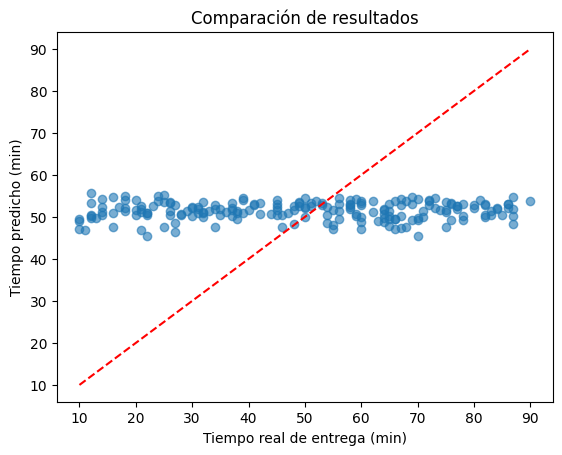

In [12]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Tiempo real de entrega (min)")
plt.ylabel("Tiempo predicho (min)")
plt.title("Comparación de resultados")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()
